# 🚢 **Experiment No.04 Netflix Data Analysis**

**Author-** *Prashant Kumar*

**Class-** *T.Y.B.Tech (CSE)*

**Roll No.-** *B34*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
netflix_titles = pd.read_csv("C:/Users/prash/Desktop/Data Analytics & Visualization/netflix_titles.csv")
title_basics = pd.read_csv("C:/Users/prash/Desktop/Data Analytics & Visualization/title.basics.tsv", sep='\t', low_memory=False)
title_ratings = pd.read_csv("C:/Users/prash/Desktop/Data Analytics & Visualization/title.ratings.tsv", sep='\t', low_memory=False)


In [3]:
# Data Cleaning and Preprocessing
title_basics = title_basics[['titleType', 'tconst', 'primaryTitle', 'originalTitle', 'startYear']]
title_basics = title_basics[title_basics.startYear.apply(lambda x: str(x).isnumeric())]
title_basics.startYear = title_basics.startYear.astype(int)

In [4]:
# Merge Ratings and Titles
title_ratings_and_titles = pd.merge(
    title_ratings.set_index('tconst'), title_basics.set_index('tconst'),
    left_index=True, right_index=True, how='inner'
)
title_ratings_and_titles = title_ratings_and_titles.drop_duplicates()

In [5]:
# Merge with Netflix Titles
title_ratings_and_titles['originalTitle_low'] = title_ratings_and_titles['originalTitle'].str.lower()
title_ratings_and_titles['primaryTitle_low'] = title_ratings_and_titles['primaryTitle'].str.lower()
netflix_titles['title_low'] = netflix_titles['title'].str.lower()

grouped_ratings_and_titles = title_ratings_and_titles.groupby('primaryTitle_low')[['numVotes', 'averageRating']].sum().reset_index()
grouped_ratings_and_titles['averageRating'] = (grouped_ratings_and_titles['averageRating'] / grouped_ratings_and_titles['numVotes']).round(1)

final = pd.merge(netflix_titles, grouped_ratings_and_titles, left_on='title_low', right_on='primaryTitle_low', how='left')
final = final.rename(columns={'averageRating': 'IMDB_rating', 'numVotes': 'IMDB_numvotes'})


C:\Users\prash\AppData\Local\Temp\ipykernel_12676\1608706378.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=kids_movies['rating'], palette='coolwarm')


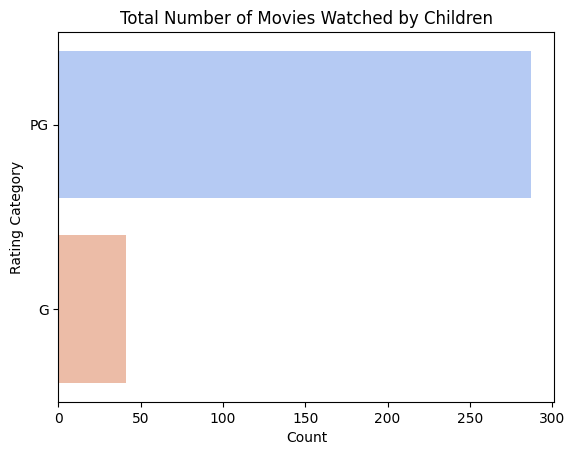

In [6]:
# --- Visualization 1: Total Movies Watched by Children ---
kids_movies = final[final['rating'].isin(['G', 'PG'])]
sns.countplot(y=kids_movies['rating'], palette='coolwarm')
plt.title("Total Number of Movies Watched by Children")
plt.xlabel("Count")
plt.ylabel("Rating Category")
plt.show()

C:\Users\prash\AppData\Local\Temp\ipykernel_12676\333537949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=standup_comedies['rating'], palette='viridis')


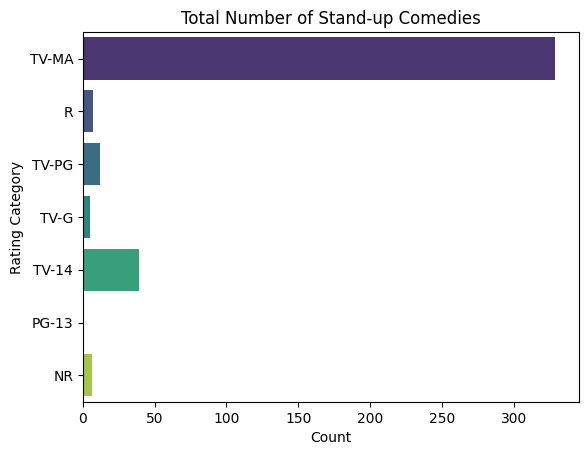

In [7]:
# --- Visualization 2: Total Stand-up Comedies ---
standup_comedies = final[final['listed_in'].str.contains('Stand-Up Comedy', na=False)]
sns.countplot(y=standup_comedies['rating'], palette='viridis')
plt.title("Total Number of Stand-up Comedies")
plt.xlabel("Count")
plt.ylabel("Rating Category")
plt.show()

C:\Users\prash\AppData\Local\Temp\ipykernel_12676\2603437204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_watched['title'], x=most_watched['IMDB_numvotes'], palette='magma')


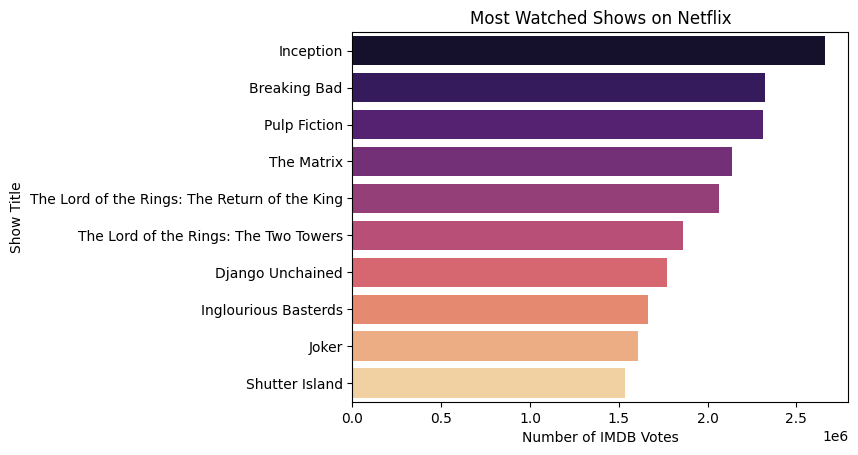

In [8]:
# --- Visualization 3: Most Watched Shows ---
most_watched = final.sort_values(by='IMDB_numvotes', ascending=False).head(10)
sns.barplot(y=most_watched['title'], x=most_watched['IMDB_numvotes'], palette='magma')
plt.title("Most Watched Shows on Netflix")
plt.xlabel("Number of IMDB Votes")
plt.ylabel("Show Title")
plt.show()


C:\Users\prash\AppData\Local\Temp\ipykernel_12676\3927603021.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=highest_rated['title'], x=highest_rated['IMDB_rating'], palette='coolwarm')


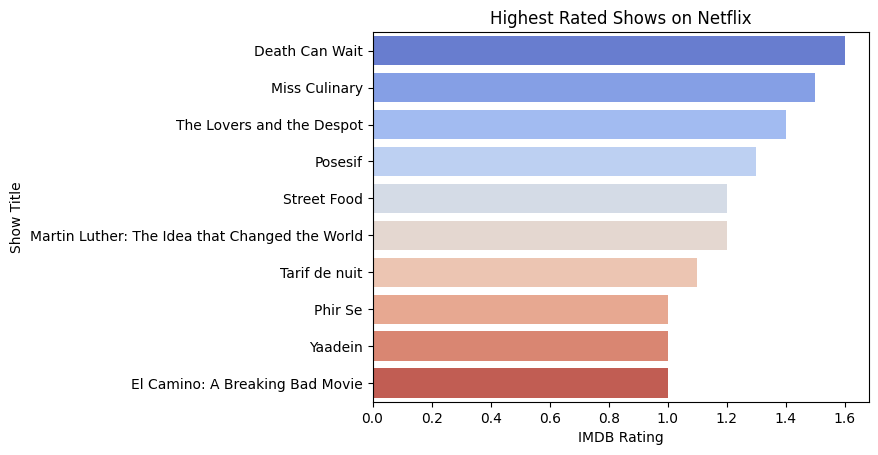

In [9]:
# --- Visualization 4: Highest Rated Shows ---
highest_rated = final.sort_values(by='IMDB_rating', ascending=False).head(10)
sns.barplot(y=highest_rated['title'], x=highest_rated['IMDB_rating'], palette='coolwarm')
plt.title("Highest Rated Shows on Netflix")
plt.xlabel("IMDB Rating")
plt.ylabel("Show Title")
plt.show()

In [11]:
import os

# Create directory if it does not exist
os.makedirs("data", exist_ok=True)

# Save the final processed data
final.to_csv("data/netflix_titles_with_IMDB.csv", index=False)


In [12]:
# Save Final Processed Data
final.to_csv("data/netflix_titles_with_IMDB.csv", index=False)
